<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Artificial Intelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_samples=100, centers=4,
                  random_state=500, cluster_std=3)

In [4]:
model = KMeans(n_clusters=4, random_state=0, n_init='auto')

In [5]:
model.fit(x)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [6]:
y_ = model.predict(x)

In [7]:
y

array([1, 1, 2, 3, 2, 2, 1, 3, 2, 3, 3, 1, 3, 0, 0, 1, 3, 0, 3, 0, 0, 1,
       2, 3, 2, 2, 0, 0, 2, 1, 3, 2, 2, 0, 2, 1, 2, 1, 3, 3, 3, 2, 0, 0,
       1, 2, 3, 0, 3, 0, 1, 0, 2, 0, 2, 1, 2, 3, 0, 1, 2, 0, 1, 3, 1, 0,
       2, 2, 2, 3, 1, 2, 3, 0, 3, 1, 3, 0, 3, 3, 2, 1, 2, 1, 3, 3, 1, 3,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0])

In [8]:
y_

array([1, 3, 0, 0, 0, 0, 3, 1, 0, 1, 1, 3, 2, 2, 2, 3, 1, 2, 1, 2, 1, 1,
       0, 1, 0, 0, 2, 2, 0, 3, 1, 0, 0, 2, 0, 3, 0, 3, 3, 1, 0, 0, 2, 2,
       3, 0, 2, 2, 0, 2, 3, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 1, 3, 3, 2,
       0, 0, 0, 1, 3, 0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 3, 0, 3, 1, 1, 3, 1,
       2, 2, 2, 3, 3, 3, 3, 2, 3, 0, 2, 2], dtype=int32)

In [9]:
y1 = np.ones_like(y)
y1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
y1 = np.where(y==0, 2,np.where(y==2,0,y))
y1

array([1, 1, 0, 3, 0, 0, 1, 3, 0, 3, 3, 1, 3, 2, 2, 1, 3, 2, 3, 2, 2, 1,
       0, 3, 0, 0, 2, 2, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 3, 3, 3, 0, 2, 2,
       1, 0, 3, 2, 3, 2, 1, 2, 0, 2, 0, 1, 0, 3, 2, 1, 0, 2, 1, 3, 1, 2,
       0, 0, 0, 3, 1, 0, 3, 2, 3, 1, 3, 2, 3, 3, 0, 1, 0, 1, 3, 3, 1, 3,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2])

In [11]:
y1 == y_

array([ True, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True, False,  True, False,  True, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False,  True, False,  True,  True,
        True])

In [12]:
(y1 == y_).sum()

55

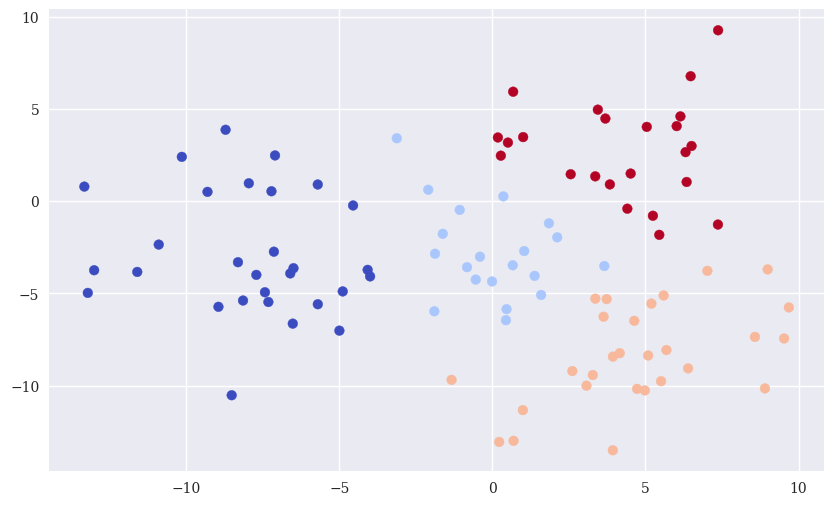

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm');

## Reinforcement Learning

In [14]:
ssp = [1, 1, 1, 1, 0]

In [15]:
asp = [1, 0]

In [16]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

In [17]:
np.random.choice?

In [18]:
rl = np.array([epoch() for _ in range(100)])
rl

array([53, 57, 54, 53, 53, 44, 41, 62, 46, 52, 52, 48, 56, 56, 47, 45, 45,
       51, 54, 49, 49, 51, 55, 53, 47, 42, 45, 58, 48, 55, 57, 54, 50, 53,
       56, 57, 51, 59, 57, 58, 48, 45, 40, 49, 46, 43, 55, 54, 47, 43, 56,
       57, 58, 45, 47, 58, 58, 48, 48, 50, 54, 51, 54, 50, 49, 53, 44, 51,
       56, 56, 65, 46, 56, 59, 41, 50, 51, 51, 49, 50, 50, 58, 49, 53, 64,
       52, 55, 44, 60, 48, 53, 49, 49, 53, 51, 50, 54, 46, 50, 50])

In [19]:
rl.mean()

51.42

In [20]:
ssp = [1, 1, 1, 1, 0]

In [21]:
def epoch():
    tr = 0
    asp = [0, 1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

In [57]:
rl = np.array([epoch() for _ in range(1000)])
rl

array([74, 65, 54, 70, 64, 60, 72, 58, 67, 77, 57, 72, 58, 54, 76, 58, 56,
       65, 73, 70, 60, 73, 71, 68, 55, 68, 64, 74, 63, 63, 66, 61, 66, 55,
       65, 68, 64, 71, 68, 75, 68, 70, 64, 69, 81, 60, 84, 70, 68, 67, 69,
       71, 63, 55, 66, 66, 65, 71, 61, 60, 67, 70, 62, 61, 59, 73, 74, 64,
       68, 73, 85, 67, 61, 63, 64, 60, 66, 73, 53, 65, 64, 67, 59, 59, 72,
       61, 76, 54, 64, 61, 66, 68, 51, 71, 62, 67, 74, 63, 64, 68, 73, 60,
       72, 74, 68, 60, 80, 72, 70, 70, 61, 72, 63, 66, 65, 74, 66, 71, 71,
       69, 69, 72, 54, 62, 73, 59, 61, 57, 67, 71, 63, 66, 64, 69, 68, 77,
       58, 61, 73, 63, 62, 69, 65, 57, 60, 70, 69, 73, 69, 67, 68, 70, 75,
       80, 73, 66, 70, 67, 69, 65, 70, 67, 68, 70, 63, 79, 64, 49, 61, 74,
       65, 60, 76, 67, 69, 70, 67, 70, 64, 75, 64, 66, 67, 67, 73, 65, 70,
       64, 60, 69, 61, 63, 72, 82, 63, 69, 62, 66, 70, 66, 66, 76, 68, 64,
       70, 67, 64, 73, 63, 66, 53, 66, 77, 55, 74, 64, 72, 69, 61, 57, 64,
       76, 65, 69, 59, 54

In [22]:
rl.mean()

51.42

## Supervised Learning

### OLS Regression

In [23]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [24]:
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [25]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

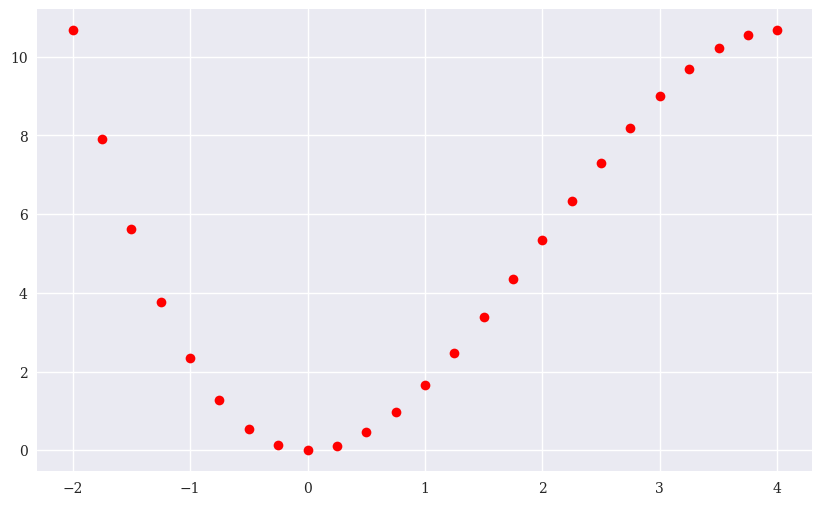

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro');

In [27]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

In [28]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [29]:
y_ = alpha + beta * x

In [30]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

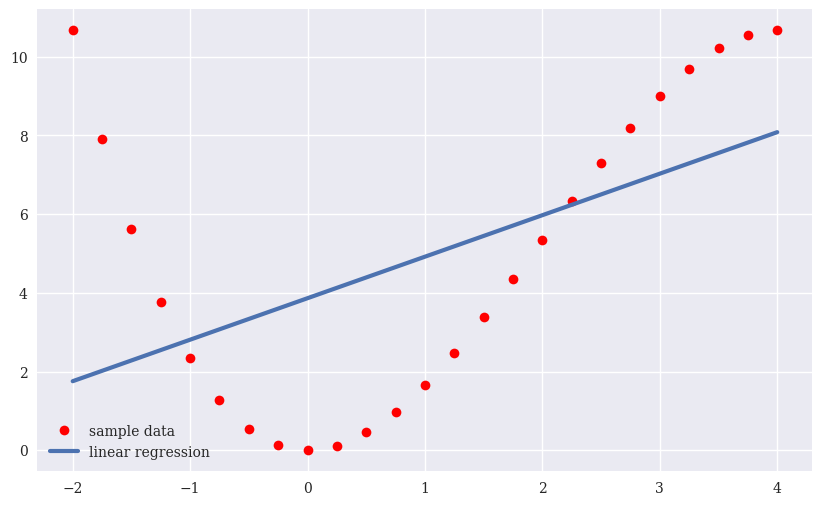

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();

reg=[1.0542 3.8625]
deg=1 | MSE=10.72195
reg=[ 1.     -0.9458  1.6125]
deg=2 | MSE=2.31258
reg=[-0.3333  2.      0.     -0.    ]
deg=3 | MSE=0.00000


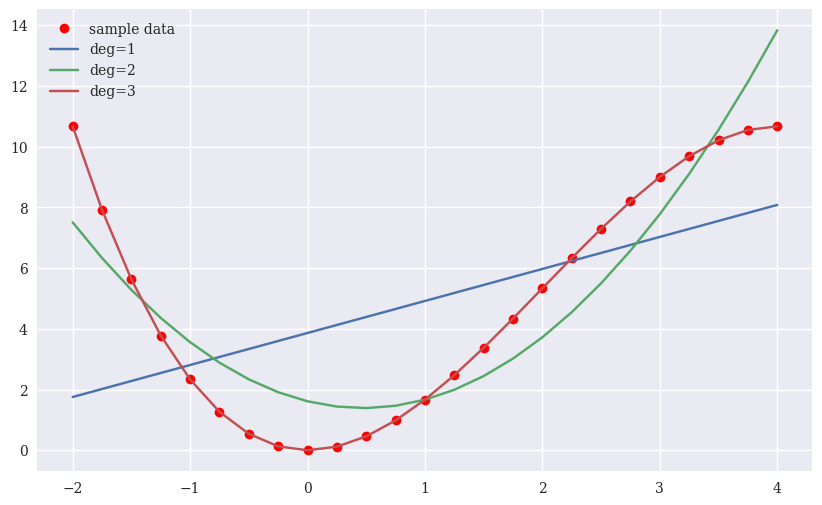

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    print(f'reg={reg}')
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [33]:
reg

array([-0.3333,  2.    ,  0.    , -0.    ])

## Neural Network &mdash; `sklearn`

In [34]:
from sklearn.neural_network import MLPRegressor

In [35]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)

In [36]:
x.shape

(25,)

In [84]:
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [37]:
x_=x.reshape(-1, 1)

In [38]:
x_.shape

(25, 1)

In [39]:
model.fit(x.reshape(-1, 1), y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [40]:
y_ = model.predict(x.reshape(-1, 1))

In [41]:
MSE = ((y - y_) ** 2).mean()
MSE

0.0015703501645398072

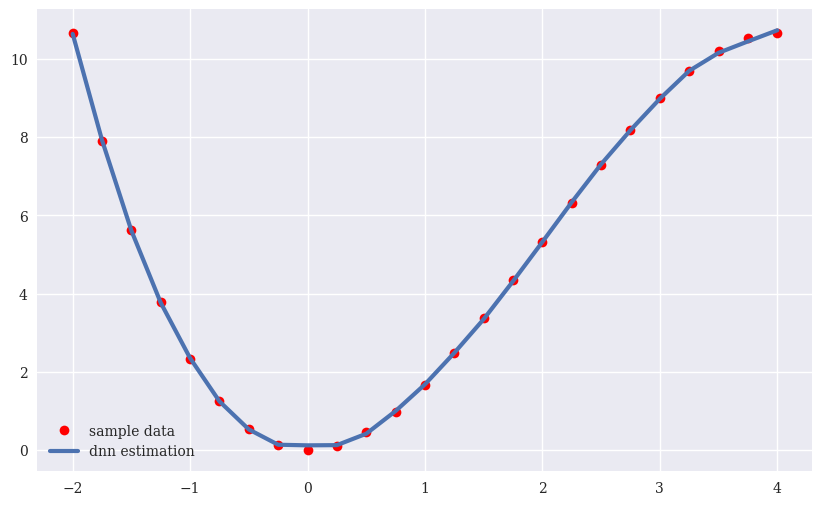

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

### Neural Network &mdash; `Keras`

In [43]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [44]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)

In [45]:
from keras.layers import Dense
from keras.models import Sequential

In [46]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1)) # <2>
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               512       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [48]:
((y - y_) ** 2).mean()

0.0015703501645398072

1/1 [==============================] - 0s 32ms/step
round=1 | MSE=3.38707
1/1 [==============================] - 0s 7ms/step
round=2 | MSE=0.77038
1/1 [==============================] - 0s 9ms/step
round=3 | MSE=0.20769
1/1 [==============================] - 0s 8ms/step
round=4 | MSE=0.11331
1/1 [==============================] - 0s 8ms/step
round=5 | MSE=0.08973


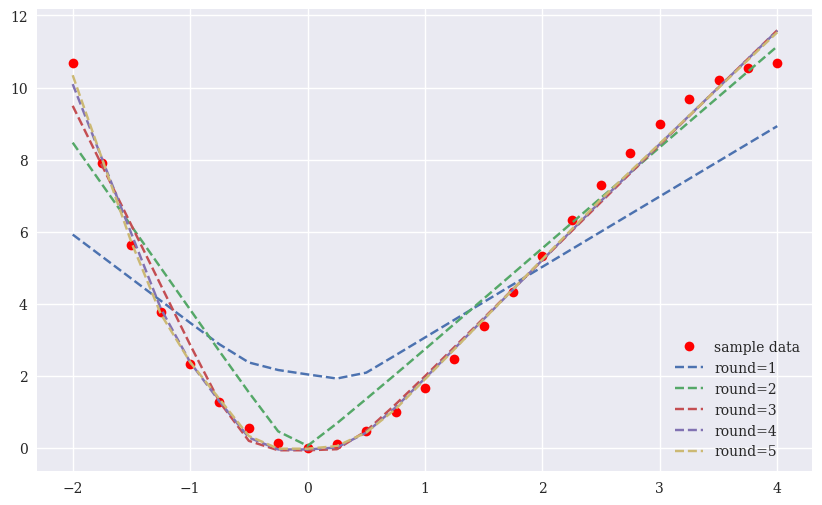

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Universal Approximation

In [50]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


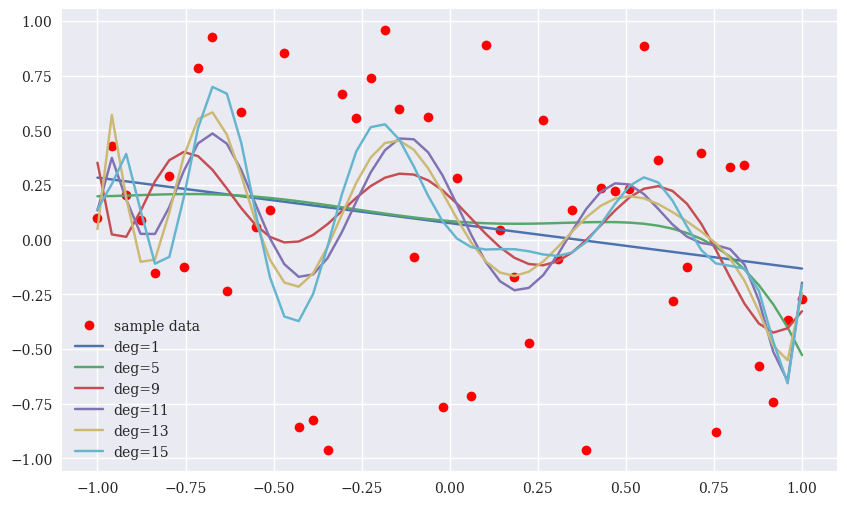

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [53]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


2/2 [==============================] - 0s 1ms/step
round=1 | MSE=0.16243
2/2 [==============================] - 0s 1ms/step
round=2 | MSE=0.12908
2/2 [==============================] - 0s 1ms/step
round=3 | MSE=0.09870
2/2 [==============================] - 0s 1ms/step
round=4 | MSE=0.05927
2/2 [==============================] - 0s 981us/step
round=5 | MSE=0.05901
2/2 [==============================] - 0s 1ms/step
round=6 | MSE=0.02505
2/2 [==============================] - 0s 1ms/step
round=7 | MSE=0.00717
CPU times: user 15.1 s, sys: 4.47 s, total: 19.6 s
Wall time: 12.2 s


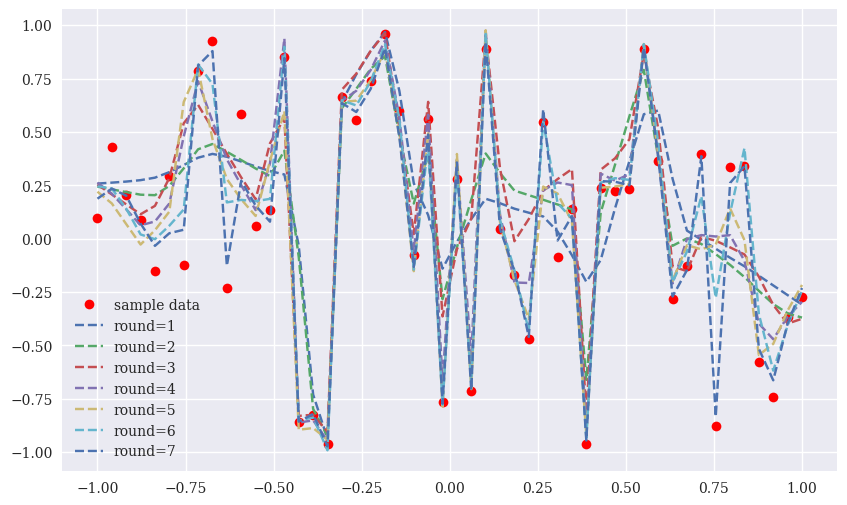

In [55]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Classification by Neutral Network

In [56]:
f = 5
n = 10

In [57]:
np.random.seed(100)

In [58]:
x = np.random.randint(0,2, (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [59]:
y = np.random.randint(0,2, n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [60]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               1536      
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [62]:
h = model.fit(x, y, epochs=50, verbose=False)

In [63]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

1/1 [==============================] - 0s 19ms/step


array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

## Importance of Big Data

In [64]:
f = 5
n = 10

In [65]:
np.random.seed(100)

In [66]:
x = np.random.randint(0, 2, (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [67]:
y = np.random.randint(0, 2, n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [68]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
             metrics=['acc'])

In [69]:
hist = model.fit(x, y, epochs=50, verbose=False)

In [70]:
hist.history

{'loss': [0.6997065544128418,
  0.6723146438598633,
  0.6548616290092468,
  0.6413233876228333,
  0.6298815608024597,
  0.620071291923523,
  0.6111292243003845,
  0.6028581857681274,
  0.5951983332633972,
  0.58796626329422,
  0.581071674823761,
  0.574471652507782,
  0.5681172013282776,
  0.562061607837677,
  0.5561259984970093,
  0.5503479242324829,
  0.5446957349777222,
  0.5392113924026489,
  0.5337292551994324,
  0.5283746123313904,
  0.5231884121894836,
  0.5179027318954468,
  0.512602686882019,
  0.5074225664138794,
  0.5023148655891418,
  0.49728450179100037,
  0.49226513504981995,
  0.48730677366256714,
  0.4823327958583832,
  0.47742804884910583,
  0.47267284989356995,
  0.46797508001327515,
  0.46329331398010254,
  0.45876845717430115,
  0.4542500376701355,
  0.4497932493686676,
  0.44546350836753845,
  0.44110995531082153,
  0.4369361996650696,
  0.4326947331428528,
  0.42851167917251587,
  0.42447566986083984,
  0.4205664098262787,
  0.41647425293922424,
  0.41252747178077

In [71]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

1/1 [==============================] - 0s 20ms/step


array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [72]:
y == y_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

In [73]:
res = pd.DataFrame(hist.history)

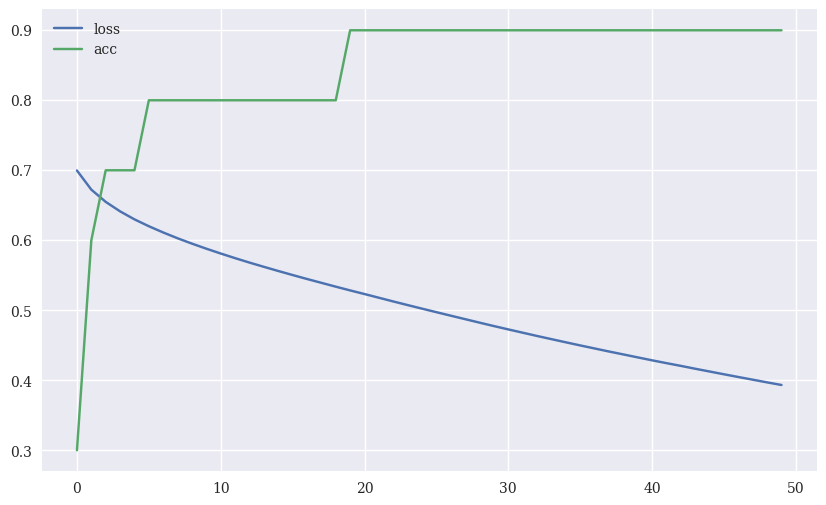

In [74]:
res.plot(figsize=(10, 6));

In [75]:
f = 10
n = 250

In [76]:
np.random.seed(100)

In [77]:
x = np.random.randint(0, 2, (n, f))
x[:4]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [78]:
y = np.random.randint(0, 2, n)
y[:4]

array([0, 1, 0, 0])

In [79]:
2 ** f

1024

In [80]:
fcols = [f'f{_}' for _ in range(f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [81]:
data = pd.DataFrame(x, columns=fcols)
data['l'] = y

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f0      250 non-null    int64
 1   f1      250 non-null    int64
 2   f2      250 non-null    int64
 3   f3      250 non-null    int64
 4   f4      250 non-null    int64
 5   f5      250 non-null    int64
 6   f6      250 non-null    int64
 7   f7      250 non-null    int64
 8   f8      250 non-null    int64
 9   f9      250 non-null    int64
 10  l       250 non-null    int64
dtypes: int64(11)
memory usage: 21.6 KB


In [83]:
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,l
0,0,0,1,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,1,1
2,0,1,0,0,0,1,1,1,0,0,0
3,1,0,0,1,1,1,1,1,0,0,0
4,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
245,0,1,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,1,0,0,0,1,1
247,0,0,0,0,1,1,1,0,0,1,1
248,0,1,1,1,1,0,0,0,1,0,0


In [84]:
grouped = data.groupby(list(data.columns))

In [85]:
list(grouped)[23]

((0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0),
      f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  l
 37    0   0   0   1   1   0   1   1   0   1  0
 237   0   0   0   1   1   0   1   1   0   1  0)

In [86]:
data.loc[[37]]

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,l
37,0,0,0,1,1,0,1,1,0,1,0


In [87]:
grouped['l'].size()

f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  l
0   0   0   0   0   0   0   1   1   1   1    1
                        1   0   1   0   0    1
                                        1    1
                                    1   1    1
                    1   0   0   0   0   0    1
                                            ..
1   1   1   1   1   0   0   0   0   0   1    1
                            1   0   0   0    1
                        1   1   0   0   1    1
                    1   1   0   0   0   0    1
                            1   0   1   1    2
Name: l, Length: 239, dtype: int64

In [88]:
freq = grouped['l'].size().unstack(fill_value=0)

In [89]:
freq

l                              0  1
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9      
0  0  0  0  0  0  0  1  1  1   0  1
                  1  0  1  0   1  1
                           1   0  1
               1  0  0  0  0   1  0
                           1   0  1
...                           .. ..
1  1  1  1  1  0  0  0  0  0   0  1
                     1  0  0   1  0
                  1  1  0  0   0  1
               1  1  0  0  0   1  0
                     1  0  1   0  2

[227 rows x 2 columns]

In [90]:
freq['sum'] = freq[0] + freq[1]

In [91]:
freq.head(10)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
                     1  1  1   0  1    1
                  1  0  0  0   0  1    1
                        1  0   0  1    1
            1  0  0  0  1  1   1  0    1
                  1  1  0  0   1  0    1

In [92]:
freq['sum'].describe().astype(int)

count    227
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        2
Name: sum, dtype: int64

In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [94]:
model = MLPClassifier(hidden_layer_sizes=[128, 128, 128],
                      max_iter=1000, random_state=100)

In [95]:
model.fit(data[fcols], data['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [96]:
accuracy_score(data['l'], model.predict(data[fcols]))

0.952

In [97]:
split = int(len(data) * 0.7)
split

175

In [98]:
train = data[:split]
test = data[split:]

In [99]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [100]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9714285714285714

In [101]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.38666666666666666

In [102]:
factor = 50

In [103]:
big = pd.DataFrame(np.random.randint(0, 2, (factor * n, f)),
                   columns=fcols)

In [104]:
big['l'] = np.random.randint(0, 2, factor * n)

In [105]:
train = big[:split]
test = big[split:]

In [106]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [107]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9657142857142857

In [108]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.5043407707910751

In [109]:
grouped = big.groupby(list(data.columns))

In [110]:
freq = grouped['l'].size().unstack(fill_value=0)

In [111]:
freq['sum'] = freq[0] + freq[1]

In [112]:
freq.head(6)

l                               0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9            
0  0  0  0  0  0  0  0  0  0   10  9   19
                           1    5  4    9
                        1  0    2  5    7
                           1    6  6   12
                     1  0  0    9  8   17
                           1    7  4   11

In [113]:
freq['sum'].describe().astype(int)

count    1024
mean       12
std         3
min         2
25%        10
50%        12
75%        15
max        26
Name: sum, dtype: int64

In [114]:
8 ** 25

37778931862957161709568

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>